In [2]:
# ---------------------------------------------Задание №1 -----------------------------------------------
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Машинное обучение/HR.csv')
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data_encoded = data.copy()
le_department = LabelEncoder()
le_salary = LabelEncoder()

data_encoded['department'] = le_department.fit_transform(data['department'])
data_encoded['salary'] = le_salary.fit_transform(data['salary'])

scaler = StandardScaler()
scaled_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company']
data_encoded[scaled_columns] = scaler.fit_transform(data_encoded[scaled_columns])

X_task1 = data_encoded.drop('left', axis=1)
y_task1 = data_encoded['left']
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(X_task1, y_task1, test_size=0.2, random_state=42)

X_task1.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,7,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,7,2
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,7,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,7,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,7,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Логистическая регрессия
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_task1, y_train_task1)
y_pred_log = log_reg.predict(X_test_task1)
acc_log = accuracy_score(y_test_task1, y_pred_log)

# Случайный лес
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_task1, y_train_task1)
y_pred_rf = rf.predict(X_test_task1)
acc_rf = accuracy_score(y_test_task1, y_pred_rf)

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_task1, y_train_task1)
y_pred_gb = gb.predict(X_test_task1)
acc_gb = accuracy_score(y_test_task1, y_pred_gb)

# Ансамблирование
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

voting_clf.fit(X_train_task1, y_train_task1)
y_pred_voting = voting_clf.predict(X_test_task1)
acc_voting = accuracy_score(y_test_task1, y_pred_voting)

{
    "Logistic Regression": acc_log,
    "Random Forest": acc_rf,
    "Gradient Boosting": acc_gb,
    "Voting Classifier": acc_voting
}


{'Logistic Regression': 0.7576666666666667,
 'Random Forest': 0.9883333333333333,
 'Gradient Boosting': 0.9736666666666667,
 'Voting Classifier': 0.9783333333333334}

Результаты точности моделей для предсказания текучести кадров:

- Логистическая регрессия: 75.77%
- Случайный лес: 98.83%
- Градиентный бустинг: 97.37%
- Ансамблирование: 97.83%
<p> Увы, но точность >99% нигде не наблюдается. Зато случайный лес дал наибольшую.


In [5]:
# ---------------------------------------------Задание №2 -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = data.drop(columns=['last_evaluation'])
y = data['last_evaluation']

categorical_features = ['department', 'salary']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_prepared = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((10499, 18), (4500, 18), (10499,), (4500,))

Данные мы подготовили:

- Обработали категориальные переменные (преобразовали с использованием OneHotEncoder и было добавлено 6 дополнительных признаков).
- Общее количество признаков после преобразования: 18.
- Разделены на тренировочную (70%) и тестовую (30%) выборки.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

feature_importances = rf_model.feature_importances_

train_rmse, test_rmse, train_r2, test_r2, feature_importances


(0.002626244438741968,
 0.018705383535967932,
 0.9105392778562877,
 0.35847119628795987,
 array([0.21748477, 0.18949935, 0.23146128, 0.06790203, 0.0209607 ,
        0.10137111, 0.00562931, 0.01166764, 0.01078268, 0.01112473,
        0.00871198, 0.01123094, 0.01257001, 0.02078012, 0.01811832,
        0.01976023, 0.02070054, 0.02024427]))

Результаты модели случайного леса для предсказания last_evaluation:

RMSE (ошибка):</br>
Тренировочные данные: 0.0026</br>
Тестовые данные: 0.018</br></br>
R2(качество модели):</br>
Тренировочные данные: 0.911</br>
Тестовые данные: 0.359</br></br>
Получается, что модель хорошо обучается на тренировочных данных, но наблюдается снижение качества на тестовых данных, что может быть признаком переобучения.

In [7]:
# ---------------------------------------------Задание №3 -----------------------------------------------

from sklearn.preprocessing import LabelEncoder

missing_values = data.isnull().sum()

label_encoder = LabelEncoder()
data['department_encoded'] = label_encoder.fit_transform(data['department'])
data['salary_encoded'] = label_encoder.fit_transform(data['salary'])

features = data.drop(columns=['department', 'salary', 'left'])

missing_values, features.head()


(satisfaction_level       0
 last_evaluation          0
 number_project           0
 average_montly_hours     0
 time_spend_company       0
 Work_accident            0
 left                     0
 promotion_last_5years    0
 department               0
 salary                   0
 dtype: int64,
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  promotion_last_5years  \
 0                   3              0                      0   
 1                   6              0                      0   
 2                   4   

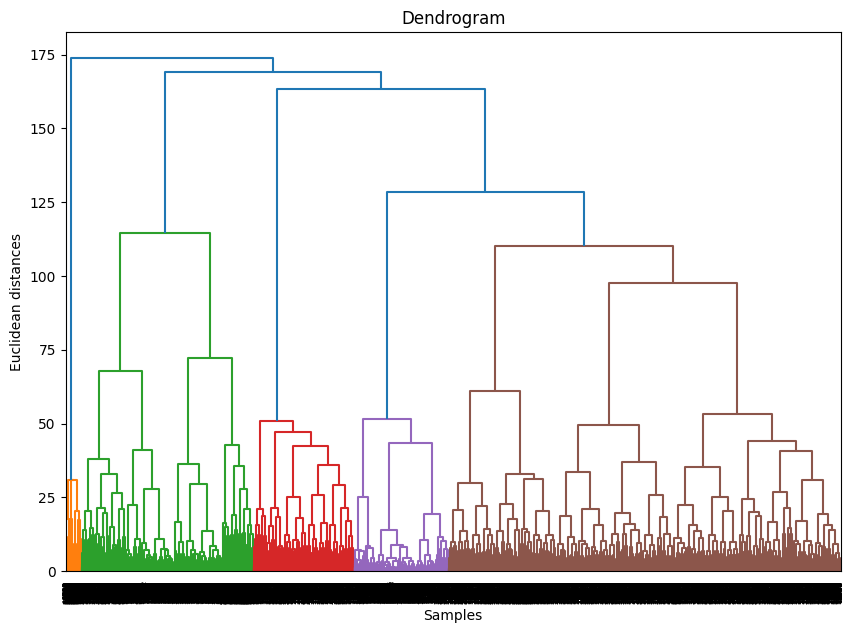

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()


Последняя дендрограмма строится очень долго (1.53 минуты)
